This notebook is structured as follows:

- [Getting started with data](#gettingstartedwithdata)
- [Exploratory data analysis](#exploratorydataanalysis)
- [sample code for simple machine learning model](#samplecodeforsimplemachinelearningmodel)
- [Task to achieve](#tasktoachieve)
- [Submission guidelines](#submissionguidelines)
- [scoring criteria](#scoringcriteria)

# Getting started with data
The dataset consist of [EEG](https://en.wikipedia.org/wiki/Electroencephalography) data collected by IDUN Guardian Earbuds.
For more information about the data refer to following link:



*  [IDUN Website](https://iduntechnologies.com/idun-guardian-in-ear-eeg-platform/)
*   [IDUN white papper highlights](https://25500273.fs1.hubspotusercontent-eu1.net/hubfs/25500273/Official%20White%20Paper%20Folder/White%20Paper%20IDUN%20Technologies.pdf)

The dataset consist of three columns i..e Marker, Timestamp_samples, Epoch.
Marker refers to the label name, Timestamp_samples refers to timepoint of occurrence of the respective marker in samples, and Epoch refers to the epoch in which the marker occurred (data was displayed in 30s windows, so if epoch is 1 that means that the marker occurred within the first 30 seconds of the recording).

For each biomarker, we used the following label structure (sleep spindle as example):


*   S0: Means we were able to see a sleep spindle in the reference system, but not in the Guardian signal.
*   S1: we were able to see a sleep spindle in both the reference system and the Guardian signal.
*   GS1: we were able to see a sleep spindle in the Guardian signal but not in the reference signal.

The same code has been used for other markers:

* S: Sleep spindles (either 0, 1, or GS1)

* K: K-complexes (either 0 or 1)

* REM: Rapid eye movements (either 0 or 1)

* Son: Sleep onset (either 0 or 1)

* Soff: Sleep offset (either 0 or 1)

* A: Arousals (either 0 or 1)

* MS: Microsleep (either 0 or 1)

we further added in at least one dataset specific marker to flag when Guardian signal quality became very bad temporarily, labelling the onset of these periods BAD_QUALITY_GUARDIAN_START and the offset of these periods BAD_QUALITY_GUARDIAN_END.


Dataset is devided into to categories:


*   trainig_data:- training_data consist of data that **participants** will use
during throughout the competition.
*   test_data:- testing_data will be used for evaluation for **participants** performance.


**Lets Dive into starters guide for the challenge !! **


In [1]:

import pandas as pd
import pandas as pd
import numpy as np

In [18]:
df=pd.read_csv('S002_night1_labelling_ready_ANNOTATED_EVENT_LABELS.csv')

In [20]:
df.head(10)

,Marker,Timestamp_samples,Epoch
0,REM1,8644,2
1,REM1,9770,2
2,REM1,11064,2
3,REM1,12266,2
4,REM1,13515,2
5,REM1,14833,2
6,S1,771984,103
7,S1,768841,103
8,S0,767183,103
9,S1,773621,104


In [23]:

print(f"Size of the dataset is {len(df)}")

Size of the dataset is 1191


In [24]:
df.dtypes

Marker               object
Timestamp_samples     int64
Epoch                 int64
dtype: object

In [25]:
df.isnull().sum()

Marker               0
Timestamp_samples    0
Epoch                0
dtype: int64

# Exploratory Data Analysis
Exploratory Data Analysis is the most important aspect of any datascience and machine learning related so the first task for the  **participants** is to analysize the dataset thouroughly some of the aspects of the dataset  like


*   Summary statistics

*   Distribution of Marker classes
*   Relationship between Epoch and Marker
*   Box plot of Timestamp_samples by Marker

is demonstrated in below cells .

As it is quoted


**“If you torture the data long enough, it will confess.”**



In [26]:
#exploratory data analysis
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Summary statistics
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
       Timestamp_samples        Epoch
count       1.191000e+03  1191.000000
mean        2.681470e+06   358.020991
std         1.295706e+06   172.751160
min         8.644000e+03     2.000000
25%         1.428521e+06   191.000000
50%         2.729153e+06   364.000000
75%         3.586424e+06   479.000000
max         4.861851e+06   649.000000


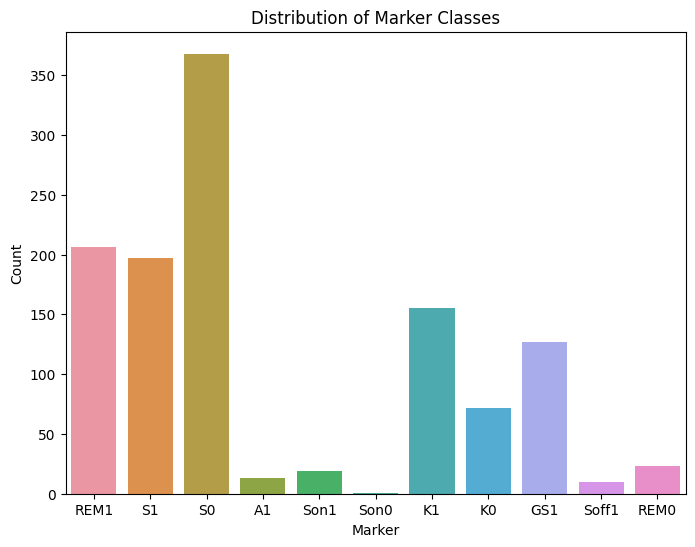

In [28]:
# Distribution of Marker classes
plt.figure(figsize=(8, 6))
sns.countplot(x='Marker', data=df)
plt.title('Distribution of Marker Classes')
plt.xlabel('Marker')
plt.ylabel('Count')
plt.show()


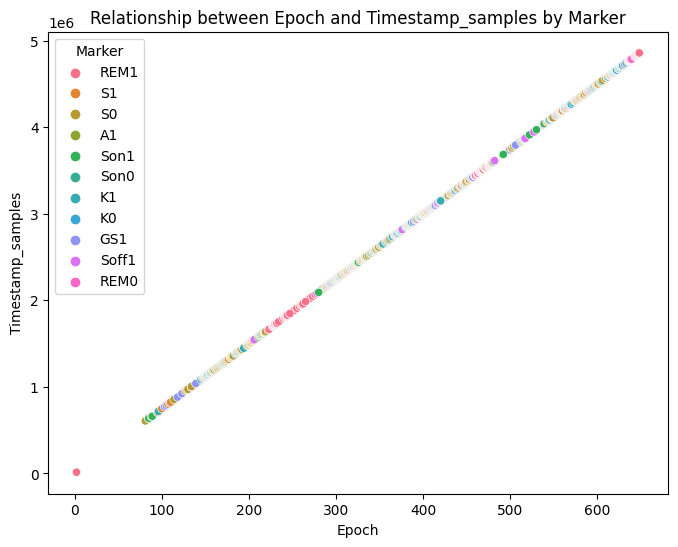

In [29]:
# Relationship between Epoch and Marker
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Epoch', y='Timestamp_samples', hue='Marker', data=df)
plt.title('Relationship between Epoch and Timestamp_samples by Marker')
plt.xlabel('Epoch')
plt.ylabel('Timestamp_samples')
plt.show()

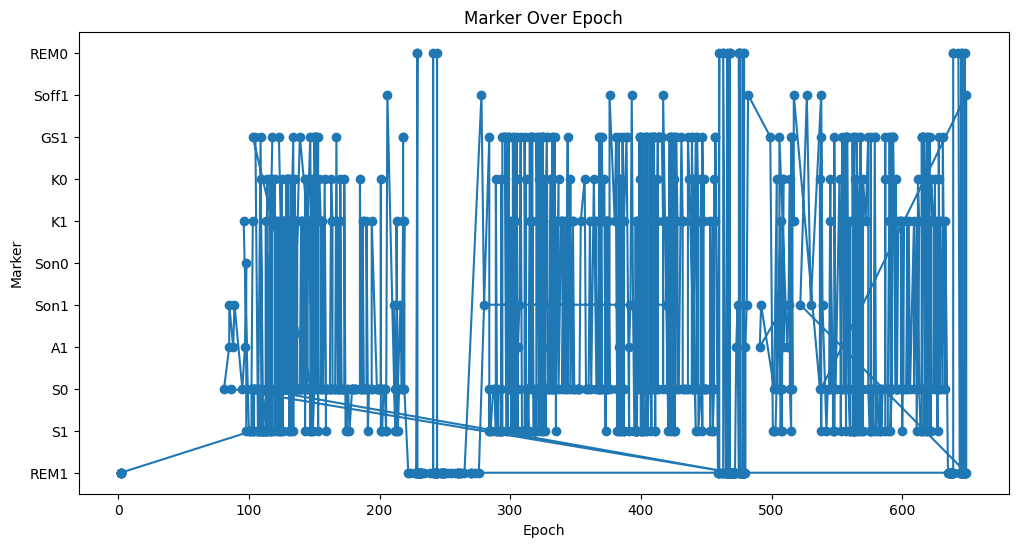

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(df['Epoch'], df['Marker'], marker='o')
plt.title('Marker Over Epoch')
plt.xlabel('Epoch')
plt.ylabel('Marker')
plt.show()


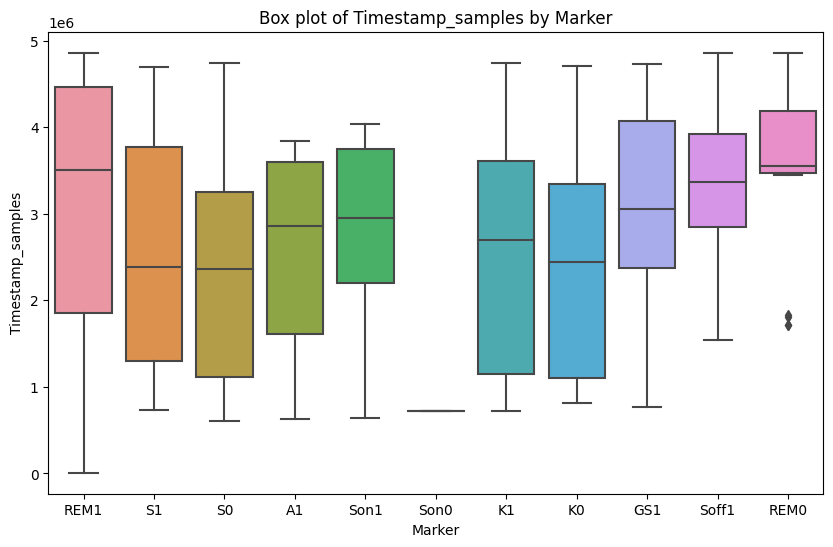

In [32]:
# Box plot of Timestamp_samples by Marker
plt.figure(figsize=(10, 6))
sns.boxplot(x='Marker', y='Timestamp_samples', data=df)
plt.title('Box plot of Timestamp_samples by Marker')
plt.xlabel('Marker')
plt.ylabel('Timestamp_samples')
plt.show()


# Feature Enigineering
The most challenging part about the challenge is feature engineering due lack of data .
bellow are some dummy features to show how feature engineering can be achieved .

**NOTE:-**bellow generated features are dummy features for the sake of demonstration they may or may not be helpful, **participants** are advised to research about publically available information about EEG signals  and them wisely design and implement features.



In [36]:
#feature engineering
df['duration_between_markers'] = df.groupby('Marker')['Timestamp_samples'].diff()
epoch_marker_counts = df.groupby('Epoch')['Marker'].nunique()
df['unique_markers_in_epoch'] = df['Epoch'].map(epoch_marker_counts)
df['time_since_last_marker'] = df.groupby('Marker')['Timestamp_samples'].diff()

In [37]:
#label encoding of markers
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['marker_encoded'] = label_encoder.fit_transform(df['Marker'])

In [39]:
from scipy.stats import entropy
markers = df['Marker']

# Calculate the entropy
marker_entropy = entropy(markers.value_counts(), base=2)

# Assign the entropy value to your DataFrame
df['marker_entropy'] = marker_entropy

In [41]:
df.head(10)

,Marker,Timestamp_samples,Epoch,duration_between_markers,unique_markers_in_epoch,marker_encoded,time_since_last_marker,marker_entropy
0,REM1,8644,2,NaN,1,5,NaN,2.705524
1,REM1,9770,2,1126.0,1,5,1126.0,2.705524
2,REM1,11064,2,1294.0,1,5,1294.0,2.705524
3,REM1,12266,2,1202.0,1,5,1202.0,2.705524
4,REM1,13515,2,1249.0,1,5,1249.0,2.705524
5,REM1,14833,2,1318.0,1,5,1318.0,2.705524
6,S1,771984,103,NaN,4,7,NaN,2.705524
7,S1,768841,103,-3143.0,4,7,-3143.0,2.705524
8,S0,767183,103,NaN,4,6,NaN,2.705524
9,S1,773621,104,4780.0,2,7,4780.0,2.705524


# sample code for simple machine learning model

The dataset has multiclass labels in markers which demonstrate various stages of sleep cycle .
Task of the participants is to train a machine learning model which can classify different stages of Marker .

Bellow we demonstrate sample code for multiclass classification .
**participants** are free to choose frameworks of their own choice for training purpose.


In [44]:
#sample code for model
import torch
import torch.nn as nn
import torch.nn.functional as F

In [48]:
#Hyperparameter
Epochs=10
batch_size=32
num_workers=2
device=torch.device("cpu")
learning_rate = 0.01


In [43]:
#model
class NeuralNet(nn.Module):
  def __init__(self,numfeatures,num_classes):
    self.l1=nn.Linear(numfeatures,10)
    self.l2=nn.Linear(10,num_classes)
  def forward(self,x):
    out=self.l1(x)
    out=F.softmax(self.l2(out))

    return out

In [49]:
def train(model,X_train,y_train,num_classes):

   numfeatures=X_train.shape[1]

   dataloader=torch.utils.data.DataLoader((X_train,y_train),batch_size=batch_size)

   loss=nn.CrossEntropyLoss()
   optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

   model=NeuralNet(numfeatures,num_classes)

   for epoch in range(Epochs):
    for X_train,y_train in dataloader:
        y_hat= model(X_train)
        l=loss(y_hat,y_train)

        l.backward()

        optimizer.step()

        optimizer.zero_grad()


        if (epoch+1)%10==0:
          print(f'epoch: {epoch+1} , loss = {l.item():.4f}')




# Task To achieve

# Submission Guidelines

# Scoring Criteria